In [1]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('autosavetime/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [2]:
from sklearn.linear_model import LinearRegression
from doubt import Boot

from distributions import DistributionShift
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from doubt.datasets import PowerPlant
from doubt import QuantileRegressionForest as QRF

## Power Plant

In [3]:
X, y = PowerPlant().split()

In [4]:
X = pd.DataFrame(X,columns = ['one','two','three','four'])

In [5]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y)

### Linear Regression

In [6]:
shift = DistributionShift(strategy='covariateShift')
clf = Boot(LinearRegression())
pipe = Pipeline([("shift", shift), ("clf", clf)])
pipe.fit(X_tr, y_tr)

Pipeline(steps=[('shift',
                 DistributionShift(cols=Index(['one', 'two', 'three', 'four'], dtype='object'))),
                ('clf', Boot(model=LinearRegression, random_seed=None))])

In [13]:
a = clf.predict(X_te, uncertainty=0.05)

In [23]:

a[1][:,1]-a[1][:,0]

array([16.72843009, 16.72346957, 16.72359262, ..., 16.722197  ,
       16.72873693, 16.7263132 ])

In [24]:
preds = []
for p in tqdm(range(-5,5)):
    pipe.set_params(shift__param=p)
    prediction = pipe.predict(X_te, uncertainty=0.05)

    preds.append(np.mean(    prediction[1][:,1]-prediction[1][:,0]))


100%|██████████| 10/10 [00:15<00:00,  1.55s/it]


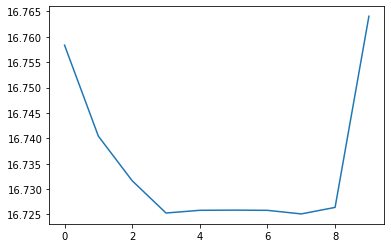

In [25]:
plt.figure()
plt.plot(preds)
plt.show()

In [27]:
preds = []
for col in tqdm(X_tr.columns):
    res = []
    for i in range(-5, 5):
        pipe.set_params(shift__param=i, shift__cols=col)
        prediction = pipe.predict(X_te, uncertainty=0.05)
        res.append(np.mean(prediction[1][:,1]-prediction[1][:,0]))
    preds.append({"col": col, "values": res})

100%|██████████| 4/4 [01:03<00:00, 15.94s/it]


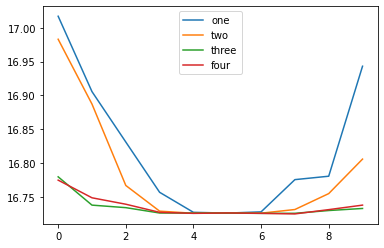

In [28]:
plt.figure()
for p in preds:
    plt.plot(p['values'],label=p['col'])
plt.legend()
plt.show()

Above figure represent the change in uncertainty prediction when 

### Quantile Regression Forest

In [21]:
clf = QRF(max_leaf_nodes=8)
shift = DistributionShift(strategy='covariateShift')
clf = Boot(LinearRegression())

pipe = Pipeline([("shift", shift), ("clf", clf)])
pipe.fit(X_tr, y_tr)



Pipeline(steps=[('shift',
                 DistributionShift(cols=Index(['one', 'two', 'three', 'four'], dtype='object'))),
                ('clf', Boot(model=LinearRegression, random_seed=None))])

100%|██████████| 100/100 [00:00<00:00, 412.88it/s]


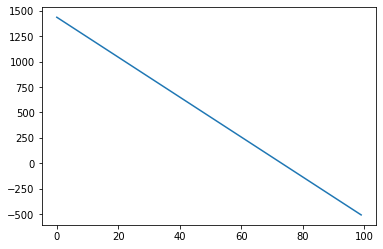

In [22]:
preds = []
for p in tqdm(range(-50,50)):
    pipe.set_params(shift__param=p)

    preds.append(np.mean(pipe.predict(X_te)))
plt.figure()
plt.plot(preds)
plt.show()

## Concrete

In [23]:
from doubt.datasets import Concrete

X, y = Concrete().split()

In [24]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y)

### Linear Regression

In [25]:
shift = DistributionShift(strategy='covariateShift')
clf = Boot(LinearRegression())
pipe = Pipeline([("shift", shift), ("clf", clf)])
pipe.fit(X_tr, y_tr)

Pipeline(steps=[('shift',
                 DistributionShift(cols=RangeIndex(start=0, stop=8, step=1))),
                ('clf', Boot(model=LinearRegression, random_seed=None))])

100%|██████████| 100/100 [00:00<00:00, 281.82it/s]


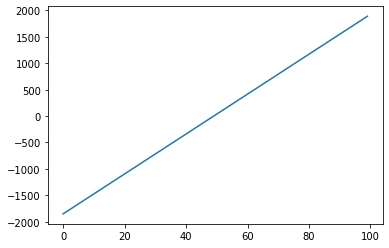

In [26]:
preds = []
for p in tqdm(range(-50,50)):
    pipe.set_params(shift__param=p)
    preds.append(np.mean(pipe.predict(X_te)))


plt.figure()
plt.plot(preds)
plt.show()

### Quantile Regression Forest

In [27]:
clf = QRF(max_leaf_nodes=8)
shift = DistributionShift(strategy='covariateShift')
clf = Boot(LinearRegression())

pipe = Pipeline([("shift", shift), ("clf", clf)])
pipe.fit(X_tr, y_tr)



Pipeline(steps=[('shift',
                 DistributionShift(cols=RangeIndex(start=0, stop=8, step=1))),
                ('clf', Boot(model=LinearRegression, random_seed=None))])

100%|██████████| 100/100 [00:00<00:00, 305.04it/s]


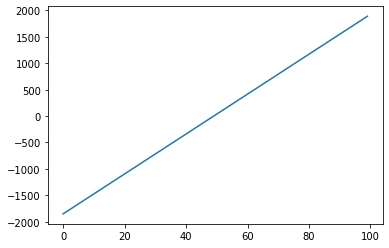

In [28]:
preds = []
for p in tqdm(range(-50,50)):
    pipe.set_params(shift__param=p)

    preds.append(np.mean(pipe.predict(X_te)))
plt.figure()
plt.plot(preds)
plt.show()